<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#00bfff;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:9px 9px;">HOUSE PRICE EDA & PREDICTION</p> 

* [1. IMPORT LIBRARIES](#1)
    
* [2. LOAD DATA](#2)
    
* [3. CHECK DATA](#3)
    
* [4. EXPLORATORY DATA ANALYSIS](#4)
    
* [5. DATA PREPROCESSING](#5)
    
* [6. MODELS](#6)

<a id = "1"></a><h1 id="Import Libraries"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Import Libraries</span></h1>

In [1]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.style as style
import matplotlib.gridspec as gridspec

from scipy import stats
from scipy.stats import boxcox 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings('ignore')

<a id = "2"></a><h1 id="Load Data"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Load Data</span></h1>

In [2]:
price_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
price_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_train = price_train.copy()
df_test = price_test.copy()
data_cleaner = [df_train, df_test]

<a id = "3"></a><h1 id="Check Data"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Check Data</span></h1>

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Explanation of The Variables and The Dataset
</center></h2>  
    
* ****SalePrice:****  the property's sale price in dollars. This is the target variable that you're trying to predict.
* ****MSSubClass:**** The building class
* ****MSZoning:**** The general zoning classification
* ****LotFrontage:**** Linear feet of street connected to property
* ****LotArea:**** Lot size in square feet
* ****Street:**** Type of road access
* ****Alley:**** Type of alley access
* ****LotShape:**** General shape of property
* ****LandContour:**** Flatness of the property
* ****Utilities:**** Type of utilities available
* ****LotConfig:**** Lot configuration
* ****LandSlope:**** Slope of property
* ****Neighborhood:**** Physical locations within Ames city limits
* ****Condition1:**** Proximity to main road or railroad
* ****Condition2:**** Proximity to main road or railroad (if a second is present)
* ****BldgType:**** Type of dwelling
* ****HouseStyle:**** Style of dwelling
* ****OverallQual:**** Overall material and finish quality
* ****OverallCond:**** Overall condition rating
* ****YearBuilt:**** Original construction date
* ****YearRemodAdd:**** Remodel date
* ****RoofStyle:**** Type of roof
* ****RoofMatl:**** Roof material
* ****Exterior1st:**** Exterior covering on house
* ****Exterior2nd:**** Exterior covering on house (if more than one material)
* ****MasVnrType:**** Masonry veneer type
* ****MasVnrArea:**** Masonry veneer area in square feet
* ****ExterQual:**** Exterior material quality
* ****ExterCond:**** Present condition of the material on the exterior
* ****Foundation:**** Type of foundation
* ****BsmtQual:**** Height of the basement
* ****BsmtCond:**** General condition of the basement
* ****BsmtExposure:**** Walkout or garden level basement walls
* ****BsmtFinType1:**** Quality of basement finished area
* ****BsmtFinSF1:**** Type 1 finished square feet
* ****BsmtFinType2:**** Quality of second finished area (if present)
* ****BsmtFinSF2:**** Type 2 finished square feet
* ****BsmtUnfSF:**** Unfinished square feet of basement area
* ****TotalBsmtSF:**** Total square feet of basement area
* ****Heating:**** Type of heating
* ****HeatingQC:**** Heating quality and condition
* ****CentralAir:**** Central air conditioning
* ****Electrical:**** Electrical system
* ****1stFlrSF:**** First Floor square feet
* ****2ndFlrSF:**** Second floor square feet
* ****LowQualFinSF:**** Low quality finished square feet (all floors)
* ****GrLivArea:**** Above grade (ground) living area square feet
* ****BsmtFullBath:**** Basement full bathrooms
* ****BsmtHalfBath:**** Basement half bathrooms
* ****FullBath:**** Full bathrooms above grade
* ****HalfBath:**** Half baths above grade
* ****Bedroom:**** Number of bedrooms above basement level
* ****Kitchen:**** Number of kitchens
* ****KitchenQual:**** Kitchen quality
* ****TotRmsAbvGrd:**** Total rooms above grade (does not include bathrooms)
* ****Functional:**** Home functionality rating
* ****Fireplaces:**** Number of fireplaces
* ****FireplaceQu:**** Fireplace quality
* ****GarageType:**** Garage location
* ****GarageYrBlt:**** Year garage was built
* ****GarageFinish:**** Interior finish of the garage
* ****GarageCars:**** Size of garage in car capacity
* ****GarageArea:**** Size of garage in square feet
* ****GarageQual:**** Garage quality
* ****GarageCond:**** Garage condition
* ****PavedDrive:**** Paved driveway
* ****WoodDeckSF:**** Wood deck area in square feet
* ****OpenPorchSF:**** Open porch area in square feet
* ****EnclosedPorch:**** Enclosed porch area in square feet
* ****3SsnPorch:**** Three season porch area in square feet
* ****ScreenPorch:**** Screen porch area in square feet
* ****PoolArea:**** Pool area in square feet
* ****PoolQC:**** Pool quality
* ****Fence:**** Fence quality
* ****MiscFeature:**** Miscellaneous feature not covered in other categories
* ****MiscVal:**** Value of miscellaneous feature
* ****MoSold:**** Month Sold
* ****YrSold:**** Year Sold
* ****SaleType:****Type of sale
* ****SaleCondition:**** Condition of sale

In [3]:
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [4]:
df_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

In [5]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())

In [6]:
check_data(df_train)

********************************************************************************
DIMENSION: (1460, 81)
********************************************************************************
COLUMNS:

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'Garage

In [7]:
check_data(df_test)

********************************************************************************
DIMENSION: (1459, 80)
********************************************************************************
COLUMNS:

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'Garage

In [8]:
check_data(df_test)

********************************************************************************
DIMENSION: (1459, 80)
********************************************************************************
COLUMNS:

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'Garage

<AxesSubplot:>

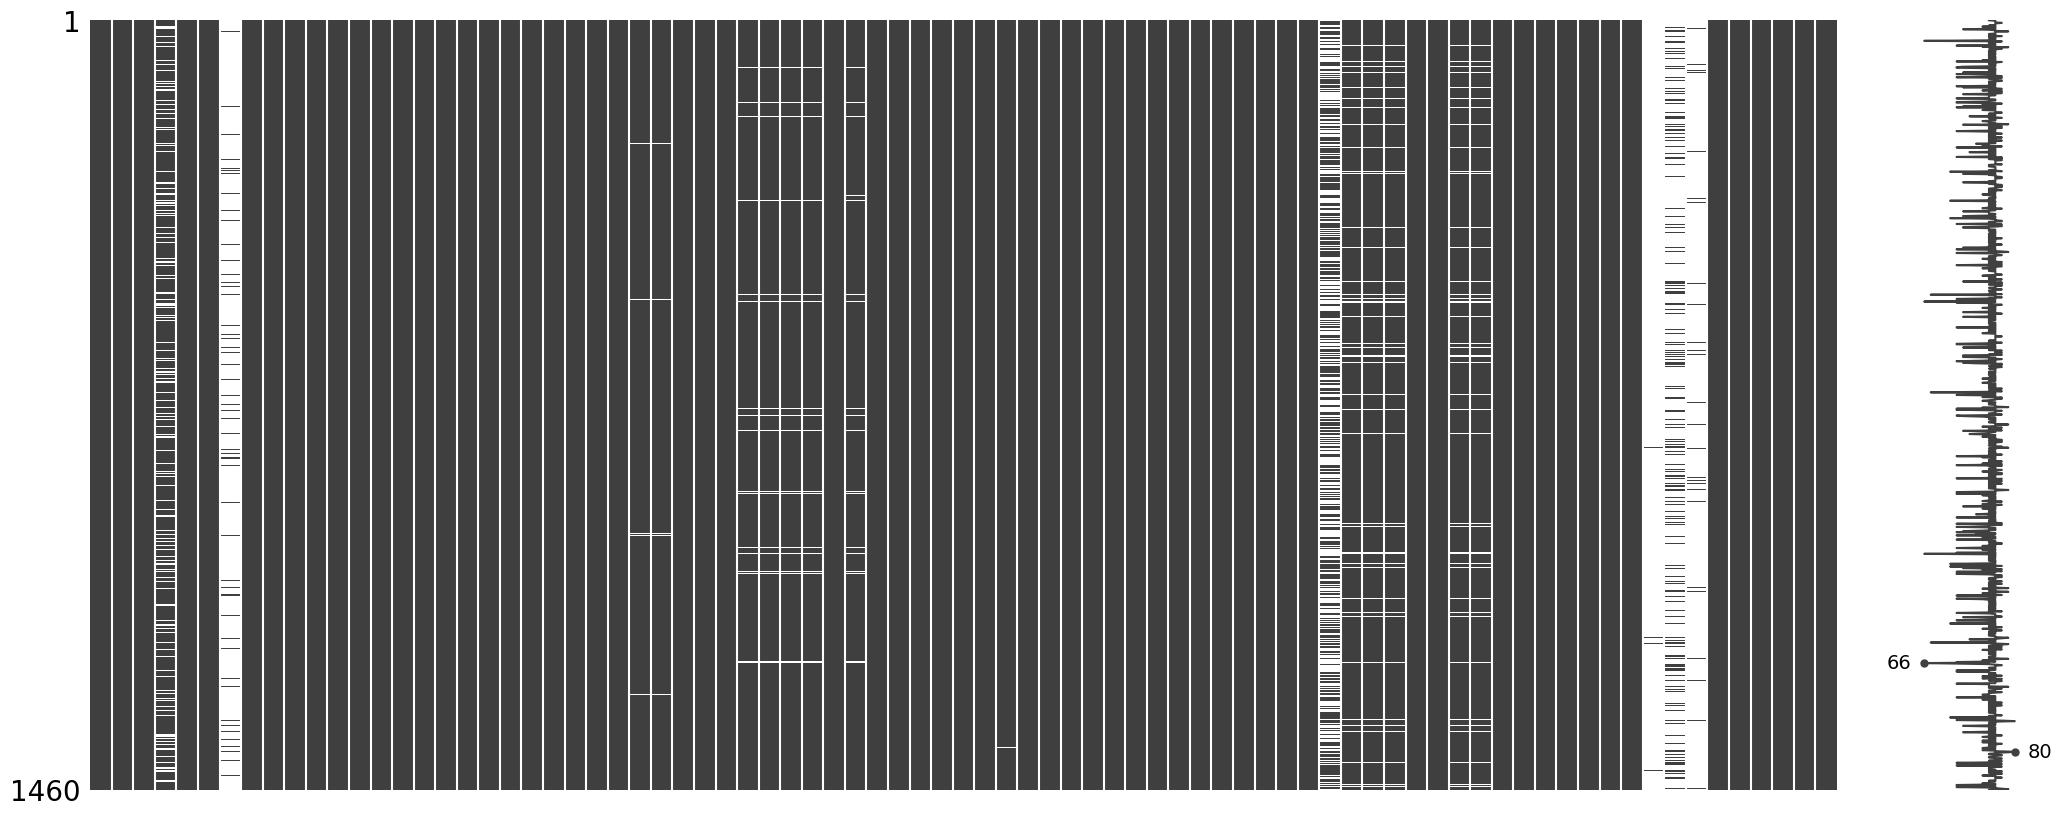

In [9]:
msno.matrix(df_train)

<AxesSubplot:>

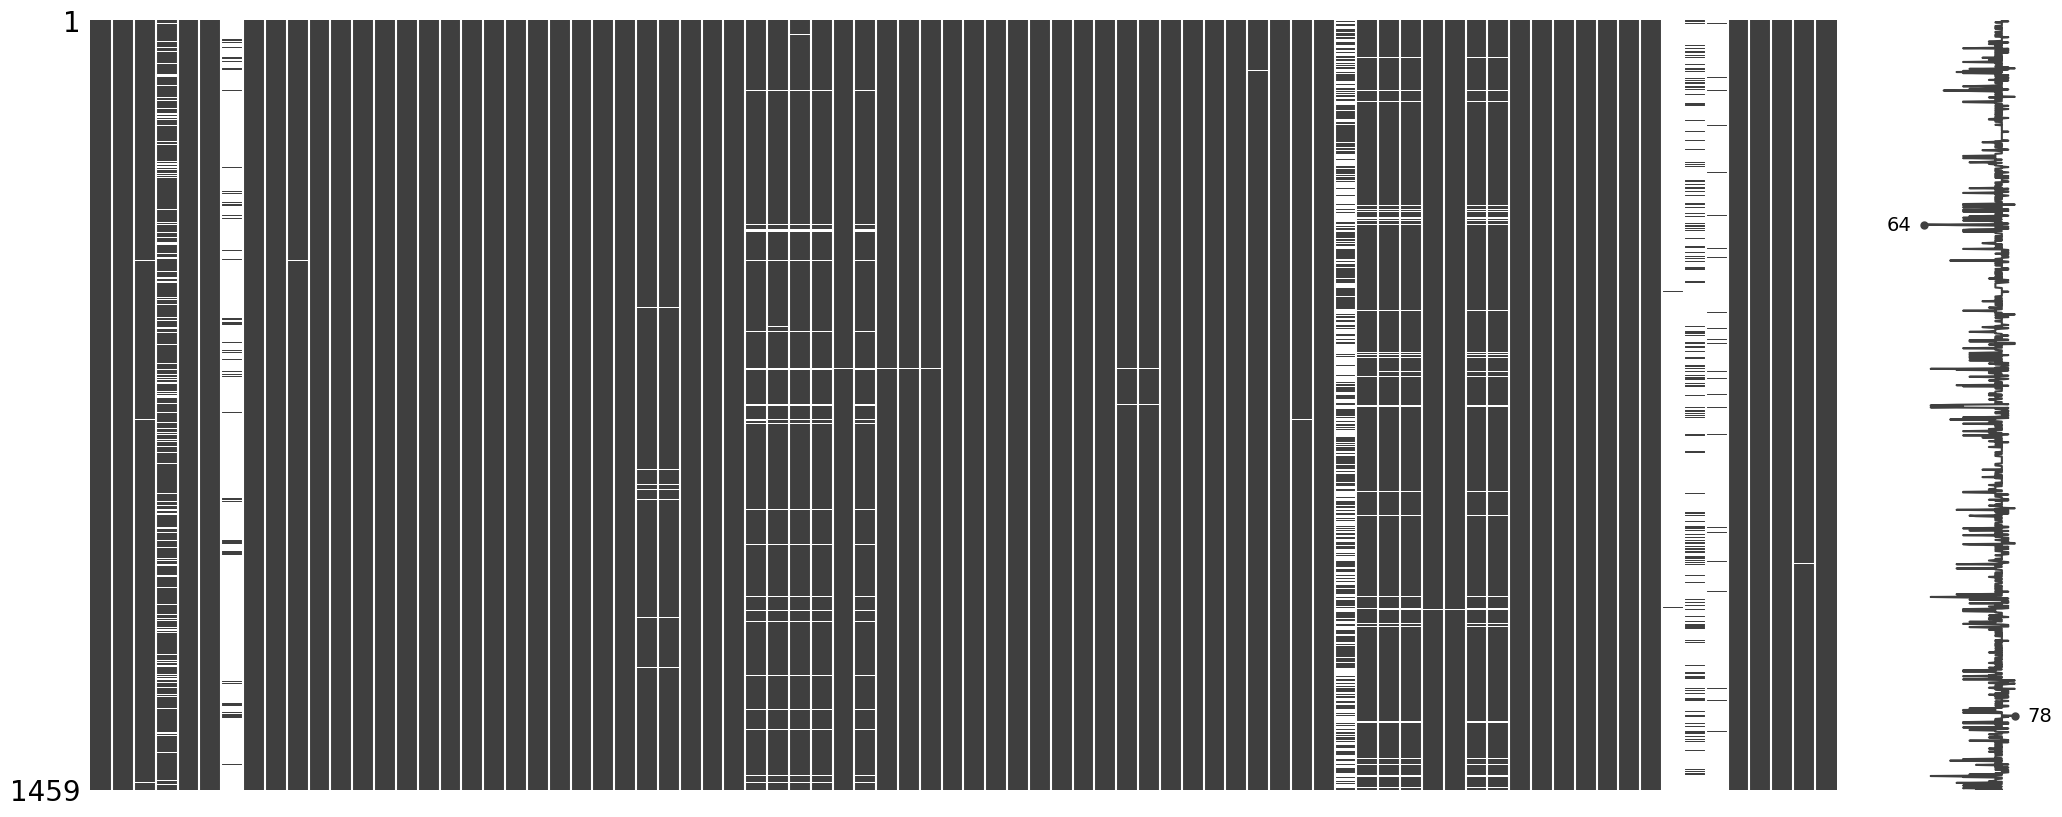

In [10]:
msno.matrix(df_test)

In [11]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [12]:
#pd.set_option("display.max_rows", None)
missing_percentage(df_test)

Total  Percent
PoolQC         1456    99.79
MiscFeature    1408    96.50
Alley          1352    92.67
Fence          1169    80.12
FireplaceQu     730    50.03
LotFrontage     227    15.56
GarageYrBlt      78     5.35
GarageQual       78     5.35
GarageFinish     78     5.35
GarageCond       78     5.35
GarageType       76     5.21
BsmtCond         45     3.08
BsmtQual         44     3.02
BsmtExposure     44     3.02
BsmtFinType1     42     2.88
BsmtFinType2     42     2.88
MasVnrType       16     1.10
MasVnrArea       15     1.03
MSZoning          4     0.27
BsmtHalfBath      2     0.14
Utilities         2     0.14
Functional        2     0.14
BsmtFullBath      2     0.14
BsmtFinSF1        1     0.07
BsmtFinSF2        1     0.07
BsmtUnfSF         1     0.07
KitchenQual       1     0.07
TotalBsmtSF       1     0.07
Exterior2nd       1     0.07
GarageCars        1     0.07
Exterior1st       1     0.07
GarageArea        1     0.07
SaleType          1     0.07

In [13]:
missing_percentage(df_train)

Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageYrBlt      81     5.55
GarageCond       81     5.55
GarageType       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtFinType2     38     2.60
BsmtExposure     38     2.60
BsmtQual         37     2.53
BsmtCond         37     2.53
BsmtFinType1     37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Summary of the Dataset
</center></h2>  
    
* The train dataset consists of 1461 rows and 81 columns.
* The test dataset consists of 1459 rows and 80 columns.
* Both datasets (train & test) contain missing values.
* Most of the features are object.

In [14]:
df_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [15]:
df_test.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

<a id = "4"></a><h1 id="Exploratory Data Analysis"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Exploratory Data Analysis</span></h1>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

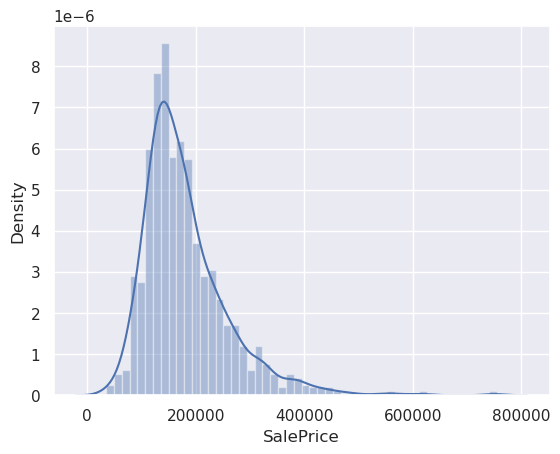

In [16]:
sns.set(style="darkgrid")
sns.distplot(df_train["SalePrice"], bins=50)

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Distribution of the Target Variable
</center></h2>  
    
* As we can easily see in the plot, the target variable is right skewed, which means it's not normally distributed. However, some models assume that the target variable is normally distributed and this assumption is violated here. Hence, we need to use a transformation method (log, box-cox, root square etc.) to prevent this situation. 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

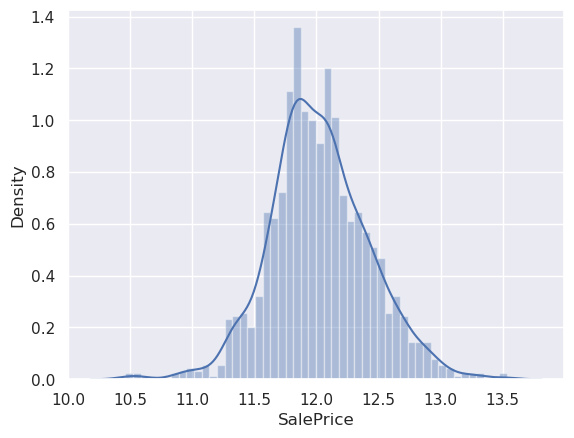

In [17]:
sns.distplot(np.log(df_train["SalePrice"]), bins=50)

In [18]:
print("Skewness: %f" % np.log(df_train['SalePrice']).skew())
print("Kurtosis: %f" % np.log(df_train['SalePrice']).kurt())

Skewness: 0.121335
Kurtosis: 0.809532


In [19]:
transformed_data, best_lambda = boxcox(df_train["SalePrice"])
td = {"td":transformed_data}

<AxesSubplot:ylabel='Density'>

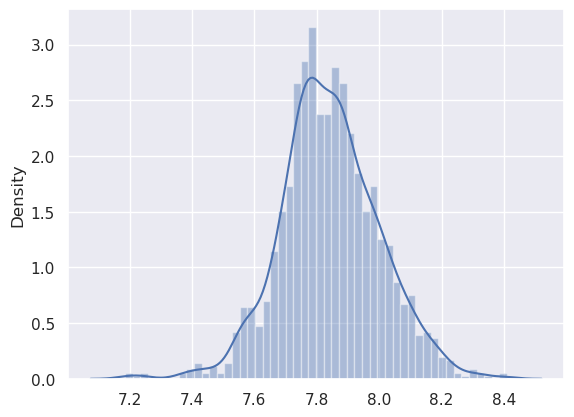

In [20]:
td = pd.DataFrame(td)
sns.distplot(td, bins=50)

In [21]:
print("Skewness: %f" % td.skew())
print("Kurtosis: %f" % td.kurt())

Skewness: -0.008653
Kurtosis: 0.877870


<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Transformation of the Target Variable
</center></h2>  
    
* Both transformation methods gave the similiar results. Hence, any of them can be used to complete the transformation in the data preprocessing step.

In [22]:
cat_cols = [col for col in df_train.columns if str(df_train[col].dtypes) in ["object", 
                                                            "category","bool"]]
num_but_cols = [col for col in df_train.columns if df_train[col].nunique() < 20 and
              df_train[col].dtypes in ["int","float"]]
cat_but_cardinality = [col for col in df_train.columns if df_train[col].nunique() > 50 and
                      str(df_train[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cols
cat_cols = [col for col in cat_cols if col not in cat_but_cardinality]

In [23]:
num_cols = [col for col in df_train.columns if df_train[col].dtypes in ["int", "float"]]
num_cols = [col for col in num_cols if col not in cat_cols]

In [24]:
df_cat = df_train[cat_cols].copy()
df_num = df_train[num_cols].copy()

In [25]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea',
       'MoSold', 'YrSold'],
      dtype='object')

In [26]:
df_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

In [27]:
print(len(df_num.columns))
print()
print(len(df_cat.columns))

23

58


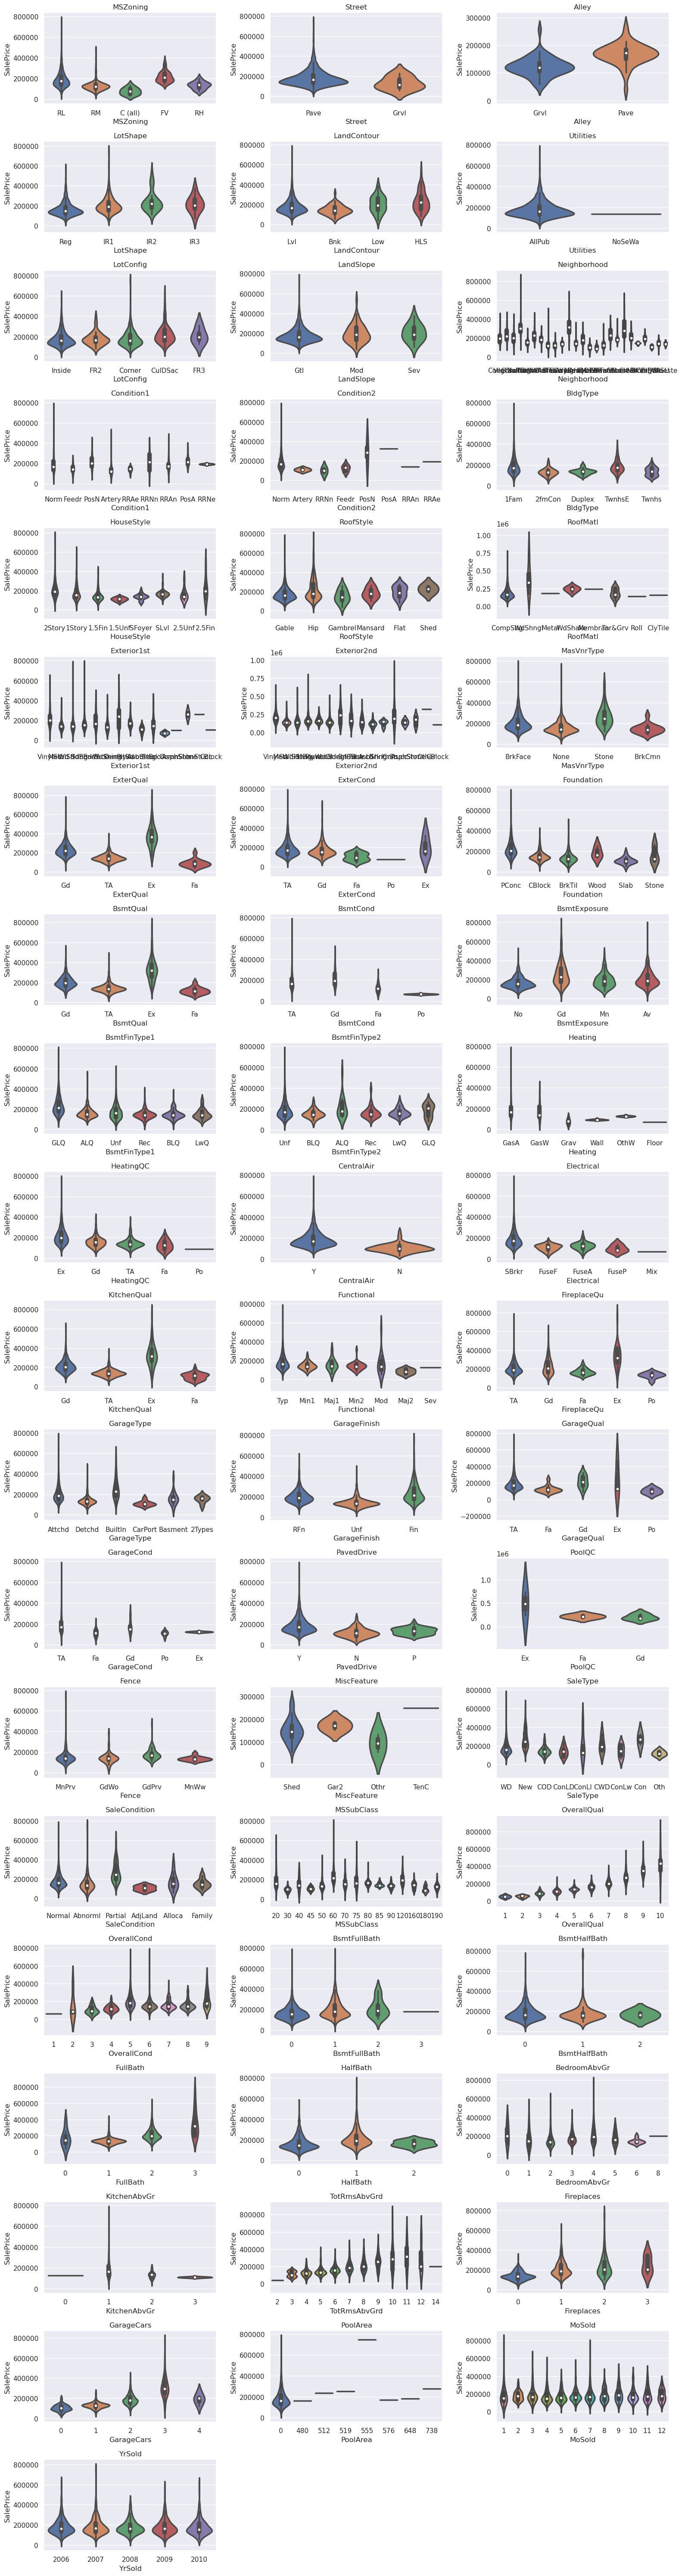

In [28]:
fig = plt.figure(figsize=(16,60))
for index, column in enumerate(list(df_cat[0:54])):
    plt.subplot(20, 3, index + 1)
    sns.violinplot(x = df_train.loc[:, column], y = df_train["SalePrice"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

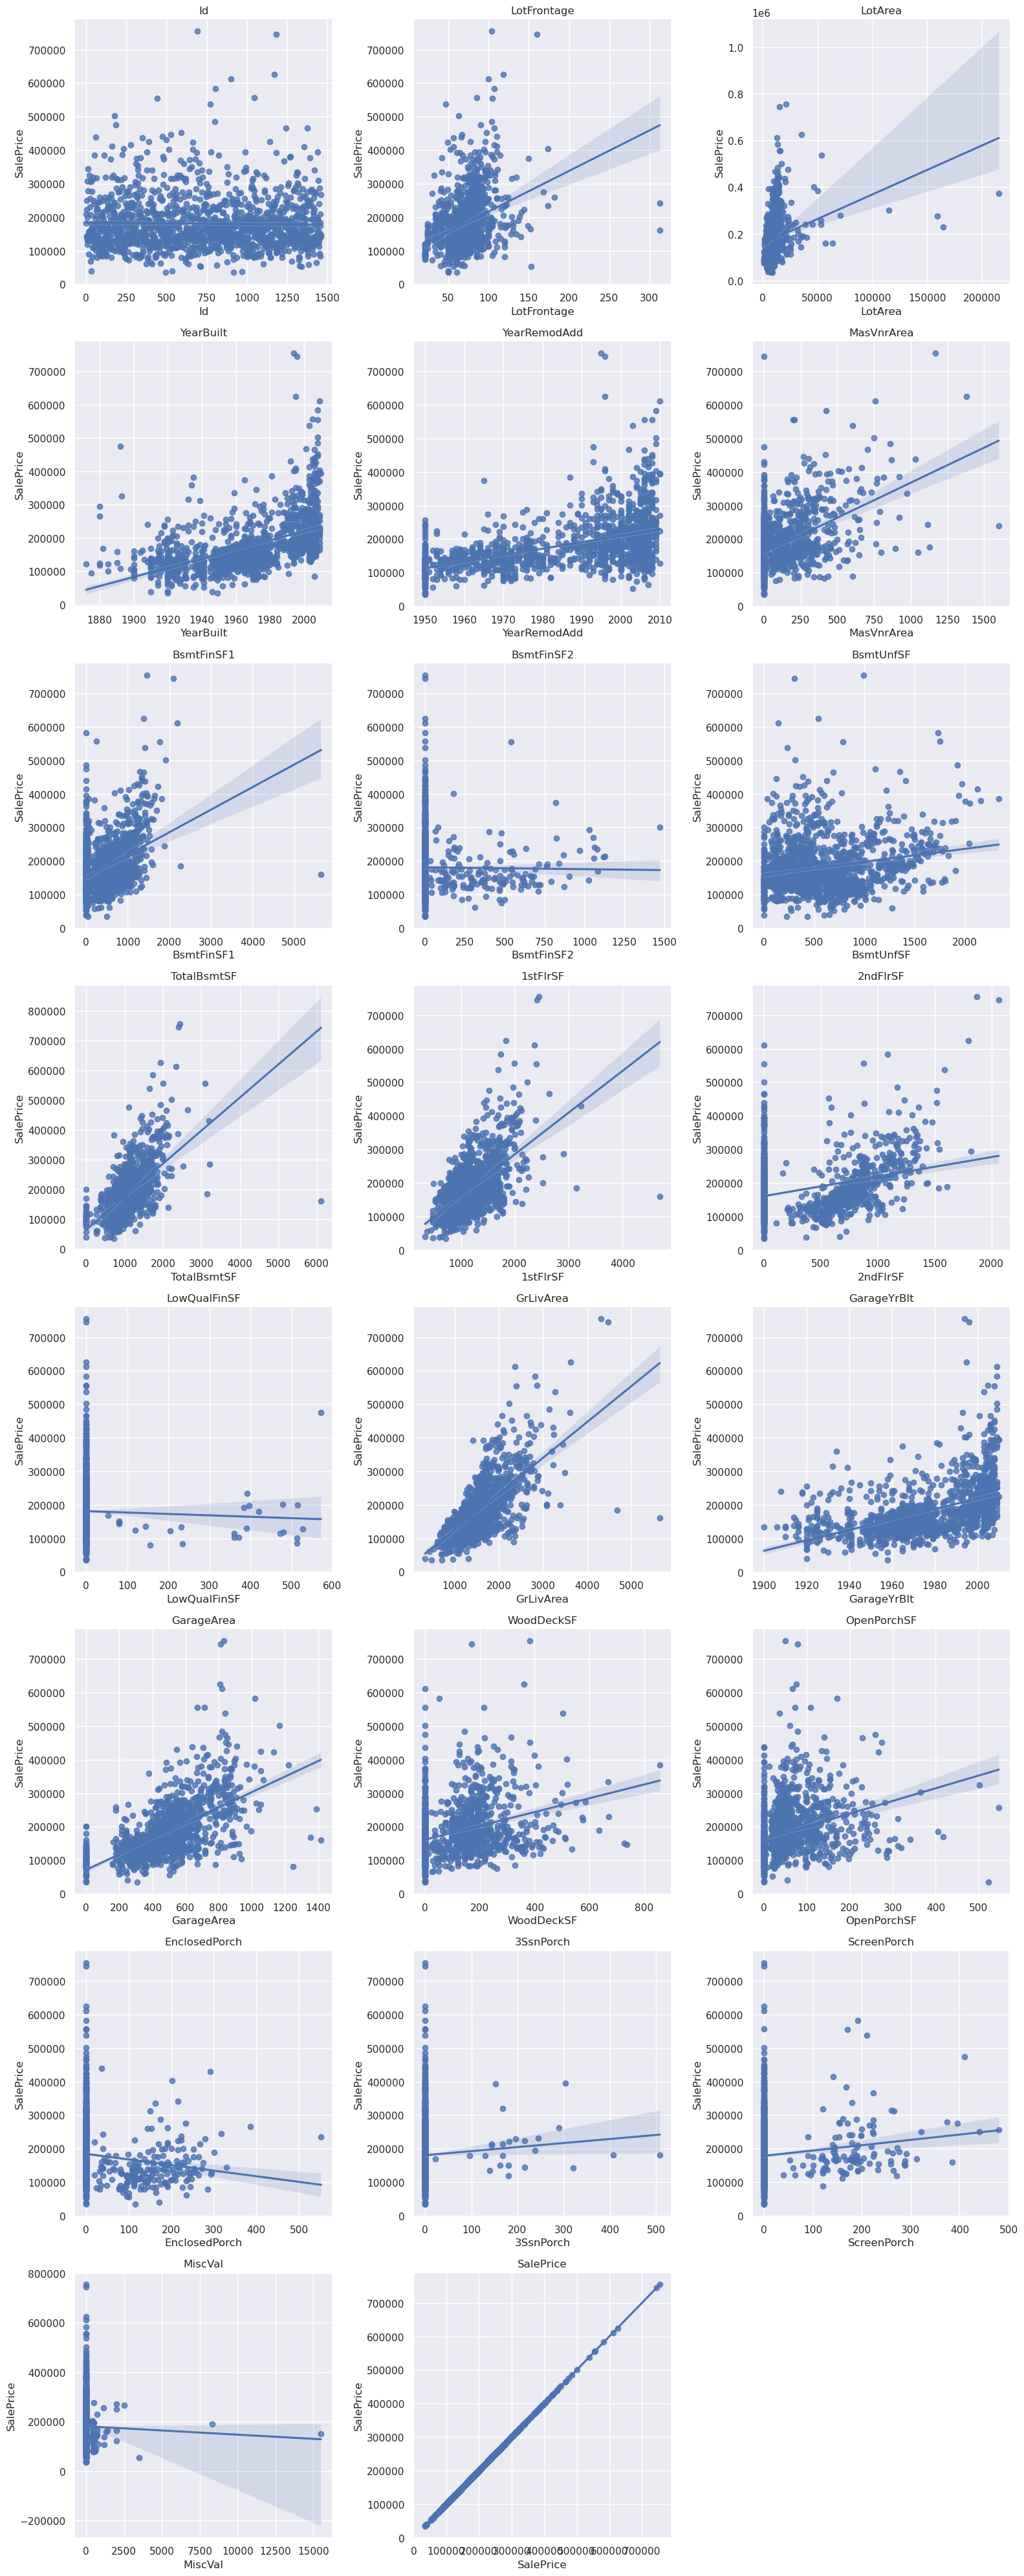

In [29]:
fig = plt.figure(figsize=(16,40))
for index, column in enumerate(list(df_num[0:26])):
    plt.subplot(8, 3, index + 1)
    sns.regplot(x = df_train.loc[:, column], y = df_train["SalePrice"])
    plt.title(column, size = 12)
fig.tight_layout()

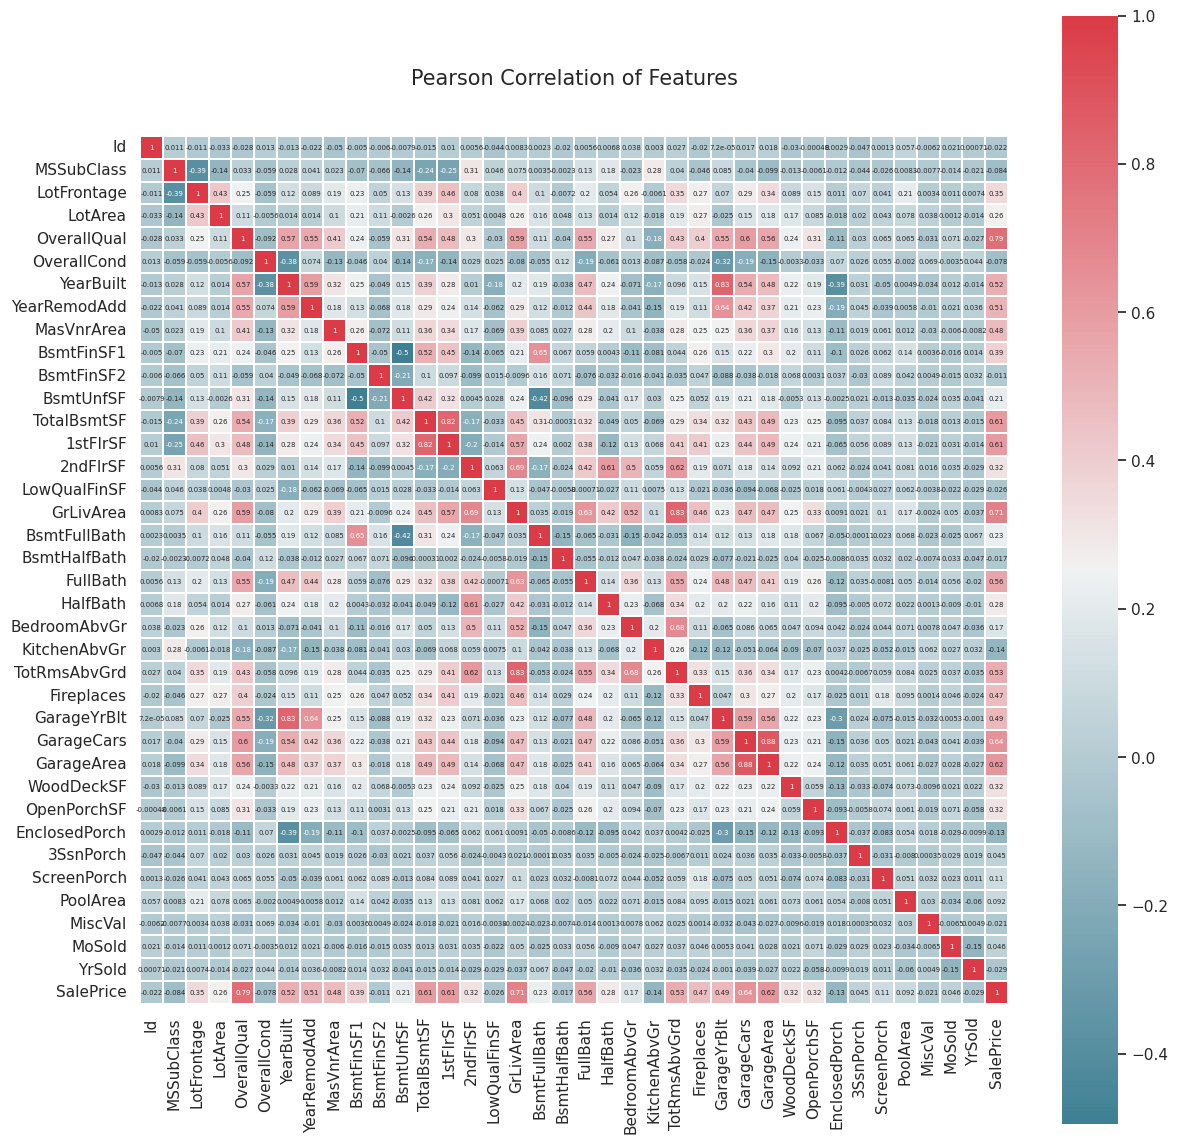

In [30]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 16))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':5 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_train)

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Observations of Numerical and Categorical Variables 
</center></h2>  
    
* There are critical outliers which may reduce the performance of the models. 
* There is a weak relation to the target variable for most of the features.
* Some independent variables are highly correlated each other, which is a signal for multicollinearity. 

<a id = "4"></a><h1 id="Data Preprocessing"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Data Preprocessing</span></h1>

In [31]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

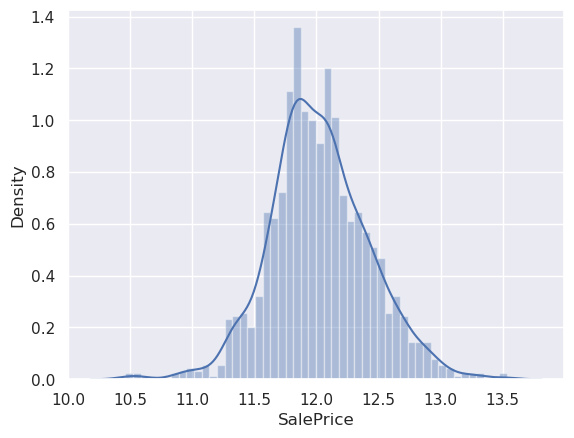

In [32]:
sns.distplot(df_train["SalePrice"], bins=50)

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Logarithmic Transformation of the Target Variable 
</center></h2>  
    
* Logarithmic transformation was applied on the target variable to have a symmetrical distribution.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

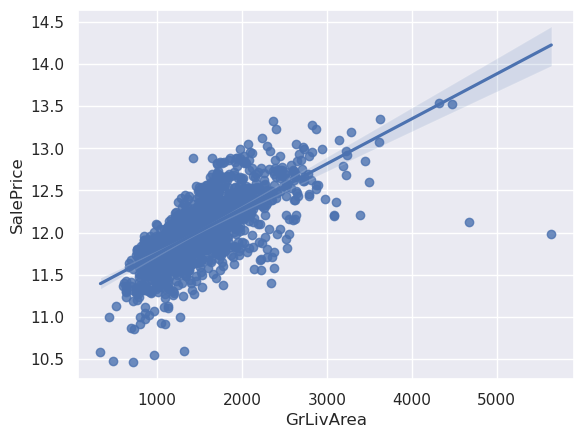

In [33]:
sns.regplot(x = df_train["GrLivArea"], y = df_train["SalePrice"])

In [34]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

In [35]:
for df in [df_train, df_test]:
    df["PoolQC"] = df["PoolQC"].fillna("None")

In [36]:
for df in [df_train, df_test]:
    df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [37]:
for df in [df_train, df_test]:
    df["Alley"] = df["Alley"].fillna("None")

In [38]:
for df in [df_train, df_test]:
    df["Fence"] = df["Fence"].fillna("None")

In [39]:
for df in [df_train, df_test]:
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [40]:
for df in [df_train, df_test]:
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [41]:
for df in [df_train, df_test]:
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')

In [42]:
for df in [df_train, df_test]:
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)

In [43]:
for df in [df_train, df_test]:
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)

In [44]:
for df in [df_train, df_test]:
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')

In [45]:
for df in [df_train, df_test]:
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [46]:
for df in [df_train, df_test]:
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [47]:
for df in [df_train, df_test]:
    df = df.drop(['Utilities'], axis=1)

In [48]:
for df in [df_train, df_test]:
    df["Functional"] = df["Functional"].fillna("Typ")

In [49]:
for df in [df_train, df_test]:
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [50]:
for df in [df_train, df_test]:
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [51]:
for df in [df_train, df_test]:
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [52]:
for df in [df_train, df_test]:
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [53]:
for df in [df_train, df_test]:
    df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [54]:
missing_percentage(df_train)

Empty DataFrame
Columns: [Total, Percent]
Index: []

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Missing Values 
</center></h2>  
    
* Most of the missing values in the dataset point out these kind of values don't exist in the related feature. They were replaced with the values like 'None' or 0.
* Rest of the missing values were filled with median or mode.

In [55]:
df_train[num_cols].skew().sort_values(ascending=False)

MiscVal          24.443364
LotArea          12.587561
3SsnPorch        10.289866
LowQualFinSF      8.998564
BsmtFinSF2        4.248587
ScreenPorch       4.115641
EnclosedPorch     3.084454
MasVnrArea        2.657499
OpenPorchSF       2.339846
WoodDeckSF        1.551271
LotFrontage       1.538478
BsmtUnfSF         0.921759
1stFlrSF          0.867081
GrLivArea         0.835192
2ndFlrSF          0.777866
BsmtFinSF1        0.744855
TotalBsmtSF       0.486395
GarageArea        0.132991
SalePrice         0.065449
Id                0.001342
YearRemodAdd     -0.499831
YearBuilt        -0.610087
GarageYrBlt      -3.863232
dtype: float64

In [56]:
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

def fixing_skewness(data, numerical_cols):
    skewed_cols = data[numerical_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_cols[abs(skewed_cols) > 0.5]
    skewed_cols = high_skew.index

    for feat in skewed_cols:
        data[feat] = boxcox1p(data[feat], boxcox_normmax(data[feat] + 1))

In [57]:
fixing_skewness(df_train, num_cols)

In [58]:
fixing_skewness(df_test, num_cols[0:22])

In [59]:
df_train[num_cols].skew().sort_values(ascending=False)

3SsnPorch        7.741182
LowQualFinSF     7.389595
MiscVal          5.197549
ScreenPorch      3.326285
BsmtFinSF2       2.643105
EnclosedPorch    2.283897
MasVnrArea       0.956219
2ndFlrSF         0.880075
WoodDeckSF       0.780849
OpenPorchSF      0.626563
TotalBsmtSF      0.486395
BsmtFinSF1       0.361422
GarageArea       0.132991
SalePrice        0.065449
BsmtUnfSF        0.053164
LotFrontage      0.022669
GrLivArea        0.013792
Id               0.001342
1stFlrSF         0.000865
LotArea         -0.196107
YearBuilt       -0.247212
YearRemodAdd    -0.499831
GarageYrBlt           NaN
dtype: float64

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Handling the Highly Skewed Features 
</center></h2>  
    
* Some features have high skewness. They were fixed using the Box-Cox transformation.

In [60]:
df_train = pd.get_dummies(df_train, columns = cat_cols)

In [61]:
df_test = pd.get_dummies(df_test, columns = cat_cols)

In [62]:
X = df_train.drop("SalePrice", axis = 1)
y = df_train["SalePrice"]

In [63]:
sc = StandardScaler()
X = sc.fit_transform(X)
# y = sc.fit_transform(y.values.reshape(-1,1))

<div style="border-radius:10px;
            border : black solid;
            background-color: #DEB887;
            font-size:100%;
            text-align: left">

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Dummy Variables for Categorical Features 
</center></h2>  
    
* The values of categorical features were replaced with dummy variables.

<a id = "4"></a><h1 id="Models"><span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Models</span></h1>

In [64]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score
nr_cv = 5
score_calc = 'neg_mean_squared_error'

In [65]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_ridge.fit(X, y)

sc_ridge = get_best_score(grid_ridge)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.12082497290116945
{'alpha': 0.5, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.5, normalize=True, tol=1e-06)


In [66]:
lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_lasso.fit(X, y)

sc_lasso = get_best_score(grid_lasso)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.1175115610970206
{'alpha': 0.001, 'normalize': False, 'tol': 1e-06}
Lasso(alpha=0.001, normalize=False, tol=1e-06)


In [67]:
param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_rf.fit(X, y)
sc_rf = get_best_score(grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.1429876535917563
{'min_samples_split': 3, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(min_samples_split=3, random_state=5)


In [68]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_knn.fit(X, y)

sc_knn = get_best_score(grid_knn)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
0.18729227579186067
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=4, weights='distance')


In [69]:
gpr = GaussianProcessRegressor(random_state=5, alpha=5e-9, 
                                n_restarts_optimizer=0, 
                               optimizer='fmin_l_bfgs_b', 
                               copy_X_train=True)

param_grid = {'normalize_y' : [True,False],
              'kernel' : [DotProduct(), ConstantKernel(1.0, (1e-3, 1e3))] }

grid_gpr = GridSearchCV(gpr, param_grid, cv=nr_cv, verbose=1, scoring = score_calc)
grid_gpr.fit(X, y)

sc_gpr = get_best_score(grid_gpr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.1328663495553448
{'kernel': DotProduct(sigma_0=1), 'normalize_y': True}
GaussianProcessRegressor(alpha=5e-09, kernel=DotProduct(sigma_0=1),
                         normalize_y=True, random_state=5)


In [70]:
enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_enet.fit(X, y)

sc_enet = get_best_score(grid_enet)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.11295009429709768
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01}
ElasticNet(alpha=0.1, l1_ratio=0.04, max_iter=1000000, normalize=False,
           tol=0.01)


In [71]:
list_scores = [sc_ridge, sc_lasso, sc_enet,
               sc_rf, sc_knn, sc_gpr]
list_regressors = ['Ridge','Lasso','ElaNet','RF','KNN','GPR']

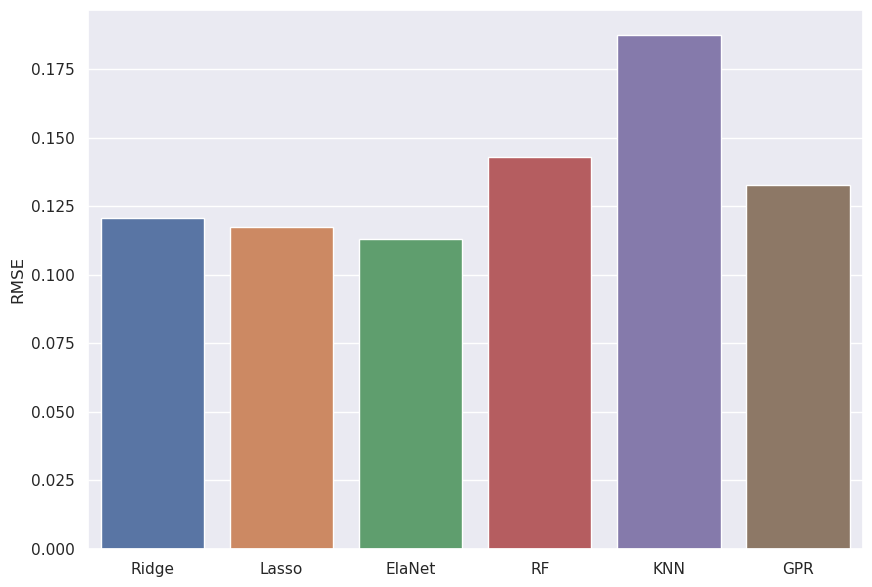

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()